## Forma Manual

### Paso 1: Ordenar todas las relaciones de mayor a menor
Arista | Peso

B-F -> 1

B-C -> 2

G-C -> 2

A-B -> 3

E-F -> 3

F-I -> 3

B-E -> 4

F-G -> 4

H-E -> 4

A-E -> 5

F-C -> 6

E-I -> 7

H-I -> 7

I-G -> 7

D-H -> 8

D-A -> 9


### Paso 2: Seleccionar 8 aristas (n-1 = 9-1 = 8) sin formar ciclos.
Estado inicial: Cada vértice es su propio conjunto

{A}, {B}, {C}, {D}, {E}, {F}, {G}, {H}, {I}


Que relaciones si cumplen `(el no estar en un mismo conjunto y formar un ciclo)`
- Arista B-F
- Arista B-C
- Arista G-C
- Arista A-B
- Arista E-F
- Arista F-I
- Arista H-E
- Arista D-H

(Si son 8 aristas)

Tendriamos entonces:
- B-F: peso 1
- B-C: peso 2
- G-C: peso 2
- A-B: peso 3
- E-F: peso 3
- F-I: peso 3
- H-E: peso 4
- D-H: peso 8

La suma de todos los pesos sale 26



## Codigo

In [1]:
class UnionFind:
    def __init__(self, vertices):
        self.parent = {v: v for v in vertices}
        self.rank = {v: 0 for v in vertices}

    def find(self, vertex):
        if self.parent[vertex] != vertex:
            self.parent[vertex] = self.find(self.parent[vertex])
        return self.parent[vertex]

    def union(self, vertex1, vertex2):
        root1 = self.find(vertex1)
        root2 = self.find(vertex2)

        if root1 != root2:
            if self.rank[root1] < self.rank[root2]:
                self.parent[root1] = root2
            elif self.rank[root1] > self.rank[root2]:
                self.parent[root2] = root1
            else:
                self.parent[root2] = root1
                self.rank[root1] += 1
            return True

        return False

In [2]:
def kruskal_mst(vertices, edges):
  print("=== ALGORITMO DE KRUSKAL ===")
  print(f"Número de vértices: {len(vertices)}")
  print(f"Número de aristas: {len(edges)}")
  print()

  # 1: Ordenar aristas por peso
  edges_sorted = sorted(edges, key=lambda x: x[2])

  print("Aristas ordenadas por peso:")
  for i, (u, v, weight) in enumerate(edges_sorted, 1):
      print(f"{i:2d}. {u}-{v}: {weight}")
  print()

  # 2: Aplicar algoritmo de Kruskal
  uf = UnionFind(vertices)
  mst_edges = []
  total_weight = 0

  print("Proceso de construcción del MST:")
  print("Arista\t\tPeso\tAcción")
  print("-" * 35)

  for u, v, weight in edges_sorted:
      if uf.union(u, v):
          mst_edges.append((u, v, weight))
          total_weight += weight
          print(f"{u}-{v}\t\t{weight}\tAceptada")
      else:
          print(f"{u}-{v}\t\t{weight}\tRechazada (forma ciclo)")

      # Si ya tenemos n-1 aristas -> enronces terminamos
      if len(mst_edges) == len(vertices) - 1:
          break

  print("-" * 35)
  print()

  print("=== RESULTADOS ===")
  print("Árbol de Expansión Mínimo (MST):")
  for i, (u, v, weight) in enumerate(mst_edges, 1):
      print(f"{i}. {u}-{v}: {weight}")

  print(f"\nPeso total del MST: {total_weight}")
  print(f"Número de aristas en el MST: {len(mst_edges)}")

  return mst_edges, total_weight

In [3]:
vertices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

edges = [
  ('D', 'A', 9),
  ('D', 'H', 8),
  ('H', 'I', 7),
  ('A', 'B', 3),
  ('A', 'E', 5),
  ('B', 'E', 4),
  ('B', 'F', 1),
  ('B', 'C', 2),
  ('E', 'I', 7),
  ('E', 'F', 3),
  ('F', 'I', 3),
  ('F', 'C', 6),
  ('F', 'G', 4),
  ('I', 'G', 7),
  ('G', 'C', 2),
  ('H', 'E', 4)
]

mst_edges, total_weight = kruskal_mst(vertices, edges)

=== ALGORITMO DE KRUSKAL ===
Número de vértices: 9
Número de aristas: 16

Aristas ordenadas por peso:
 1. B-F: 1
 2. B-C: 2
 3. G-C: 2
 4. A-B: 3
 5. E-F: 3
 6. F-I: 3
 7. B-E: 4
 8. F-G: 4
 9. H-E: 4
10. A-E: 5
11. F-C: 6
12. H-I: 7
13. E-I: 7
14. I-G: 7
15. D-H: 8
16. D-A: 9

Proceso de construcción del MST:
Arista		Peso	Acción
-----------------------------------
B-F		1	Aceptada
B-C		2	Aceptada
G-C		2	Aceptada
A-B		3	Aceptada
E-F		3	Aceptada
F-I		3	Aceptada
B-E		4	Rechazada (forma ciclo)
F-G		4	Rechazada (forma ciclo)
H-E		4	Aceptada
A-E		5	Rechazada (forma ciclo)
F-C		6	Rechazada (forma ciclo)
H-I		7	Rechazada (forma ciclo)
E-I		7	Rechazada (forma ciclo)
I-G		7	Rechazada (forma ciclo)
D-H		8	Aceptada
-----------------------------------

=== RESULTADOS ===
Árbol de Expansión Mínimo (MST):
1. B-F: 1
2. B-C: 2
3. G-C: 2
4. A-B: 3
5. E-F: 3
6. F-I: 3
7. H-E: 4
8. D-H: 8

Peso total del MST: 26
Número de aristas en el MST: 8


## Visualizacion

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [11]:
def visualizar_grafo(edges, name='Árbol de Expansión Mínimo (MST) - Algoritmo de Kruskal'):
  positions = {
            'A': (2, 4),
            'B': (1, 3),
            'C': (0, 2),
            'D': (3, 5),
            'E': (2, 2),
            'F': (1, 1),
            'G': (0, 0),
            'H': (4, 3),
            'I': (3, 1)
  }

  plt.figure(figsize=(10, 8))

  # Dibujar aristas del MST
  for u, v, weight in edges:
      x1, y1 = positions[u]
      x2, y2 = positions[v]
      plt.plot([x1, x2], [y1, y2], 'b-', linewidth=2, alpha=0.7)

      # Agregar peso
      mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
      plt.text(mid_x, mid_y, str(weight), fontsize=10,
              bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

  # Nodos
  for node, (x, y) in positions.items():
      circle = patches.Circle((x, y), 0.15, facecolor='lightblue',
                            edgecolor='black', linewidth=2)
      plt.gca().add_patch(circle)
      plt.text(x, y, node, ha='center', va='center', fontsize=12, fontweight='bold')

  plt.xlim(-0.5, 4.5)
  plt.ylim(-0.5, 5.5)
  plt.title(name, fontsize=14)
  plt.grid(True, alpha=0.3)
  plt.axis('equal')
  plt.show()



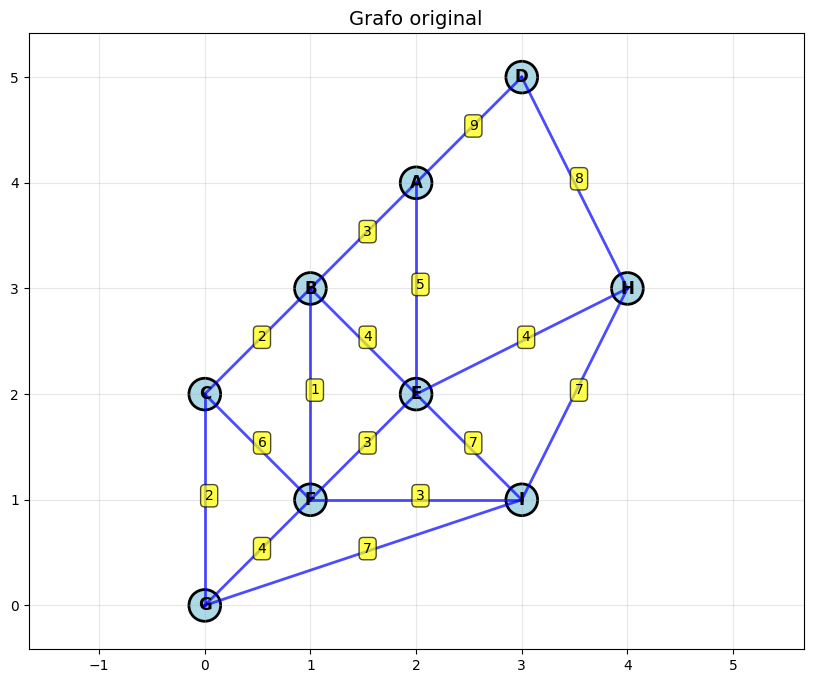

In [14]:
# Grafo Original
visualizar_grafo(edges, name="Grafo original")

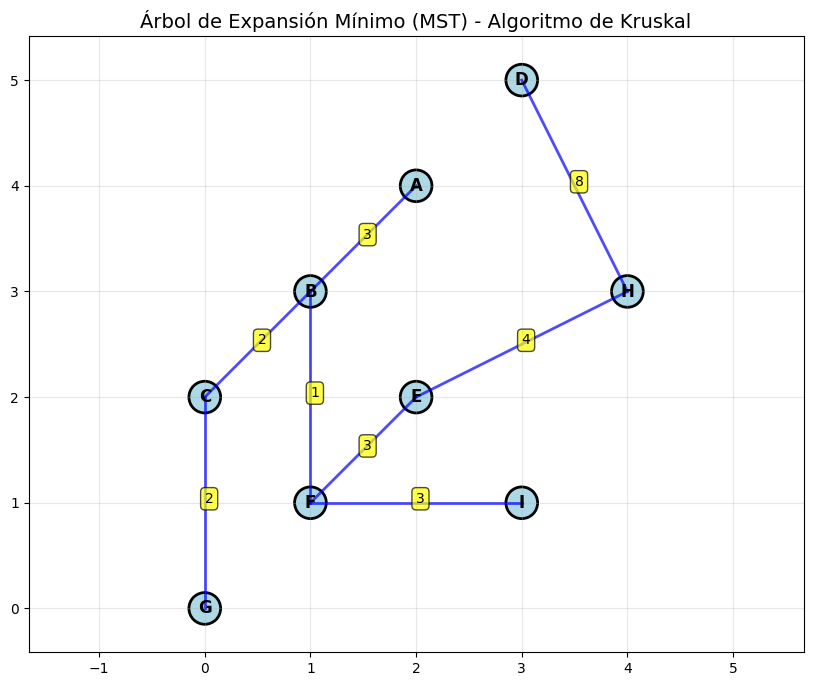

In [15]:
# Arbol de Expansion Minima
visualizar_grafo(mst_edges)